In [22]:
import numpy as np

class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            #if(_ % 1000): print(_)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [11]:
import pandas
df = pandas.read_csv(r'C:\Users\e6540\Desktop\machine.csv')
print(df)

      vendor          model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser          32/60   125   256   6000   256     16    128  198  199
1     amdahl         470v/7    29  8000  32000    32      8     32  269  253
2     amdahl        470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl        470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl        470v/7c    29  8000  16000    32      8     16  132  132
..       ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
204   sperry           80/8   124  1000   8000     0      1      8   42   37
205   sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
206   sratus             32   125  2000   8000     0      2     14   52   41
207     wang         vs-100   480   512   8000    32      0      0   67   47
208     wang          vs-90   480  1000   4000     0      0      0   45   25

[209 rows x 10 columns]


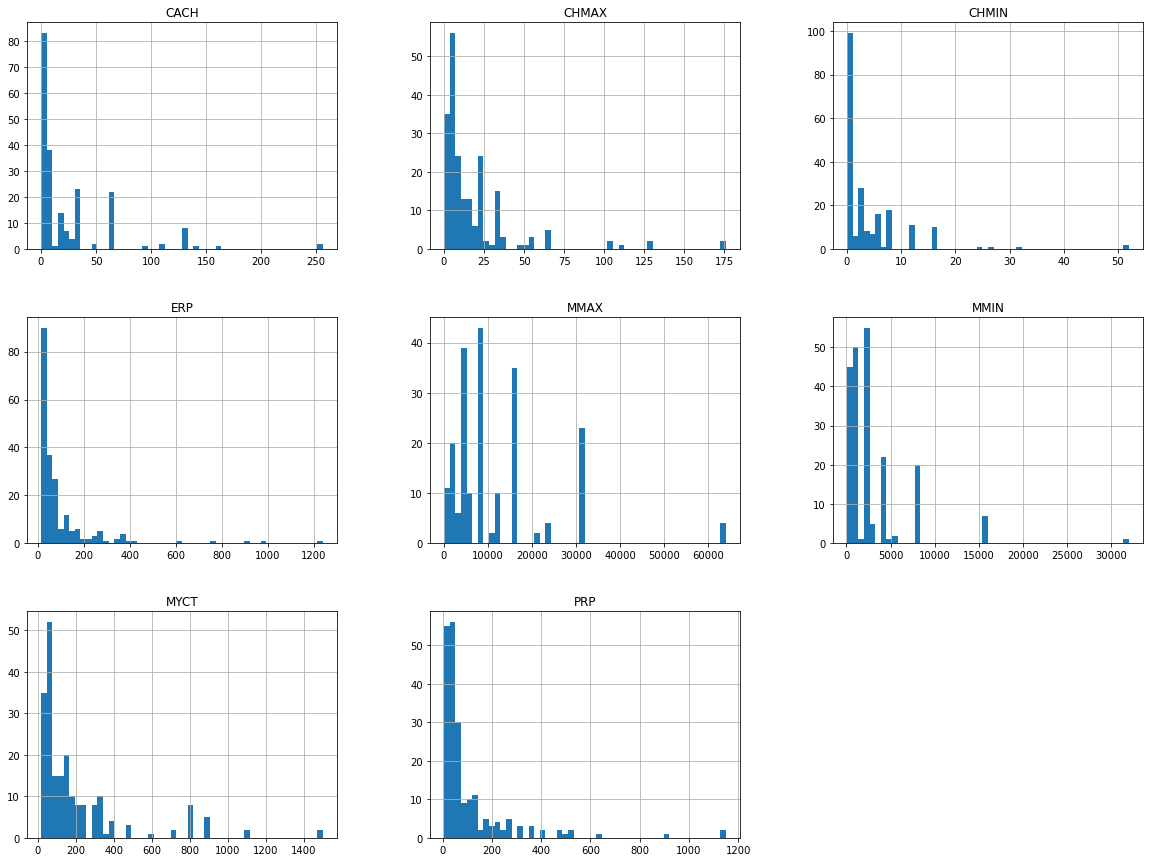

In [12]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183C1BB9670>,
      dtype=object)

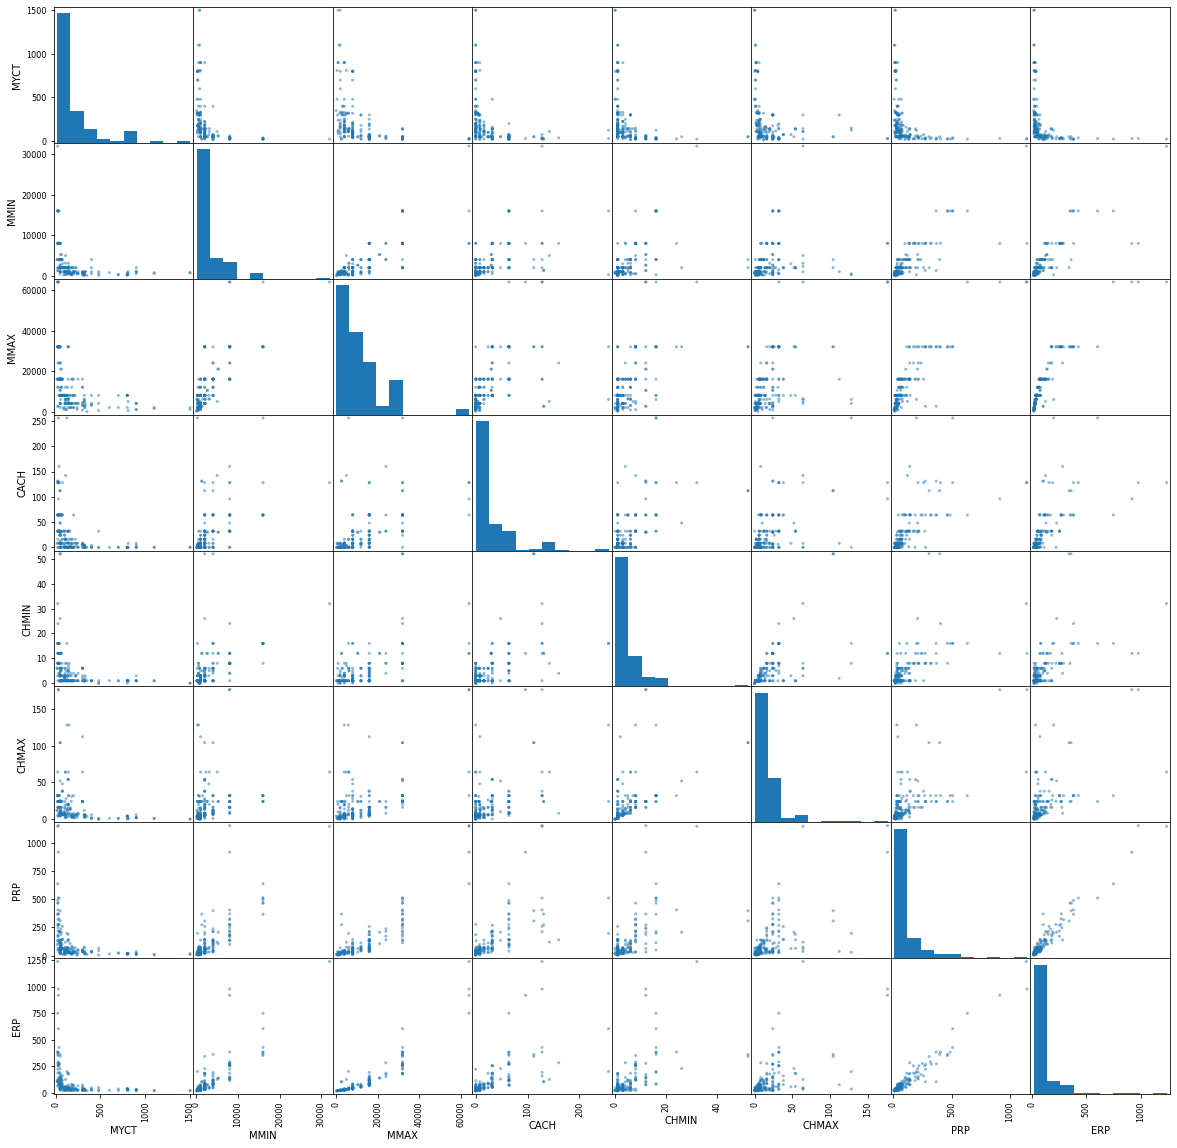

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20))

In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

X_train = train[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_train = train['ERP']

lin_reg = LinearRegression(learning_rate=0.0000000001, n_iters=90000)
lin_reg.fit(X_train, y_train)

In [39]:
X_test = test[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_test = test['ERP']

y_pred = lin_reg.predict(X_test)
print(y_pred)

[ 23.96893746  65.94049396  27.62358409  32.48171267  39.86275691
   3.85507228  41.26146822 224.30960177 224.354805    65.68518287
 132.43545367  54.45152204 222.44314691 113.04860039  27.14951939
  -3.0005477  163.44889137 276.3042903   40.40595359  18.18052563
 108.86906175 250.54959237  16.21661616  26.70058118 225.52374517
  41.43137749  31.57820287 328.55287675  26.32237726  41.51633213
 454.72839488  14.39126062 339.12876066  81.74441489  96.01865204
  81.00053226  38.49841061  30.49171051  53.25067586  85.74174765
  41.09155894  36.48301297]


In [40]:
y_test

110     28
133     46
10      23
137     33
159     26
107     18
60      34
189    149
98     113
132     46
115     76
125     30
94     171
166     80
202     24
108     17
144     95
190    183
39      30
16      23
162     47
196    341
182     22
74      25
150    126
59      34
176     25
3      253
73      23
61      34
7      381
72      20
192    382
70      47
71      54
89      57
17      29
201     24
183     31
75      52
57      34
81      30
Name: ERP, dtype: int64

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1936.4343333547256

In [42]:
mean_squared_error(y_test, y_pred, squared=False)

44.00493532951418

In [44]:
import numpy
corrcoef = numpy.corrcoef(y_test, y_pred)[0, 1]
print(corrcoef)

0.9345659865582578

In [49]:
import math
math.sqrt(numpy.corrcoef(y_test, y_pred)[0, 1])

0.9667295312331459